# `CNN`

### `I`. `Cấu trúc CNN`

CNN được xây dựng từ nhiều lớp khác nhau, mỗi lớp thực hiện một nhiệm vụ cụ thể trong quá trình trích xuất và xử lý đặc trưng từ dữ liệu đầu vào. Cấu trúc điển hình của CNN bao gồm bốn loại lớp chính: `Convolutional Layer`, `Activation Layer`, `Pooling Layer`, và `Fully Connected Layer`.

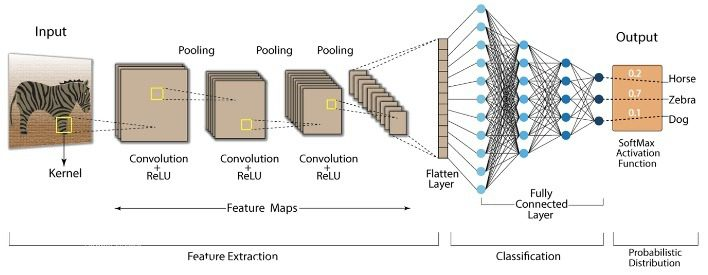

`1`. `Convolutional Layer`

Là nền tảng `cốt lõi` của CNN, chịu trách nhiệm `trích xuất` các đặc trừng từ hình anh đầu vào. Bộ lọc `filter` sẽ `trượt` qua hình ảnh và `tính toán` phép tích chập giữa anh và bộ lọc đó.

`Minh họa `

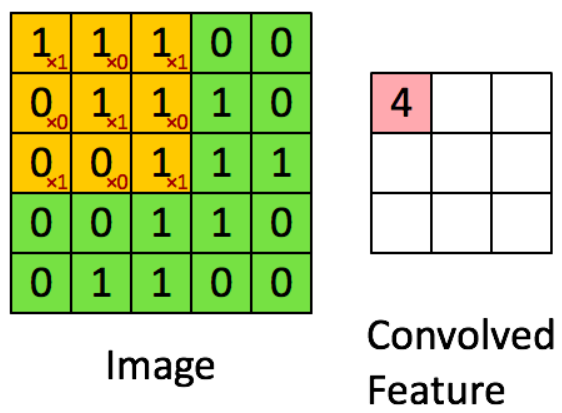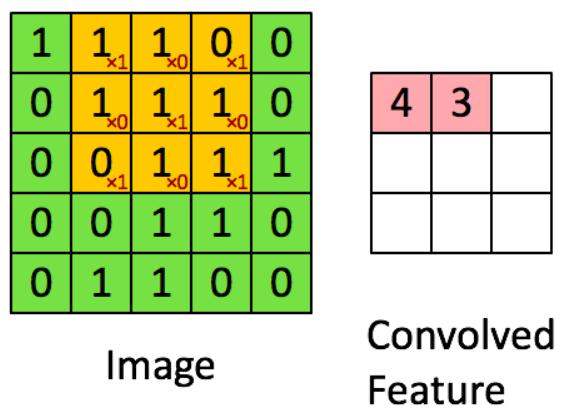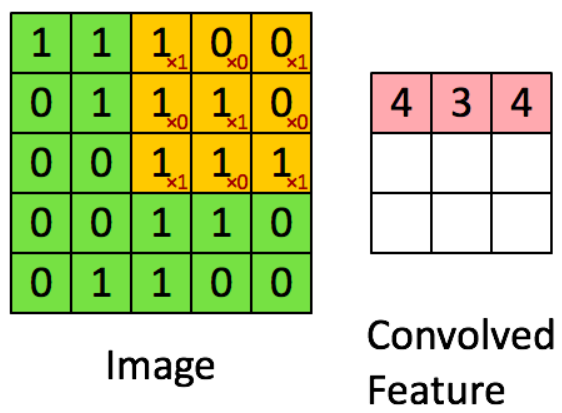

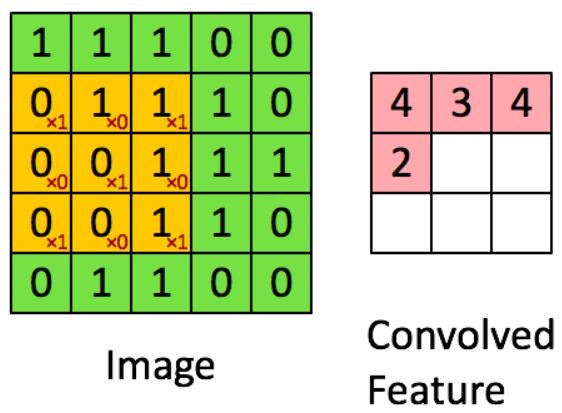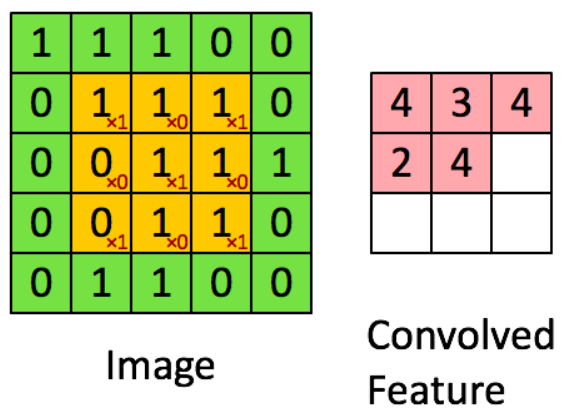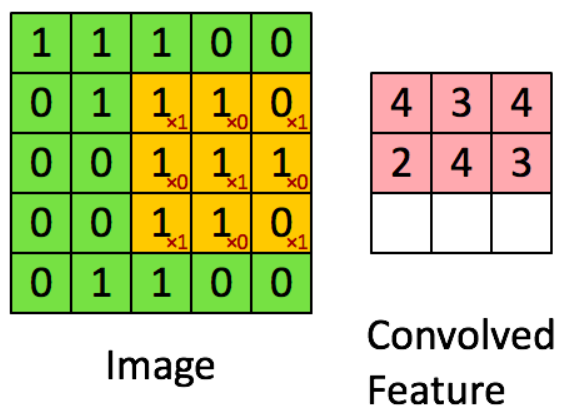

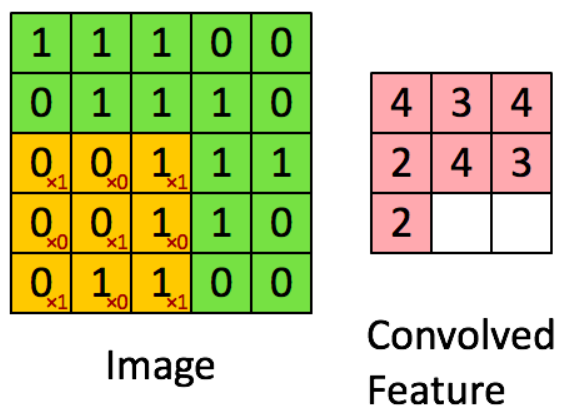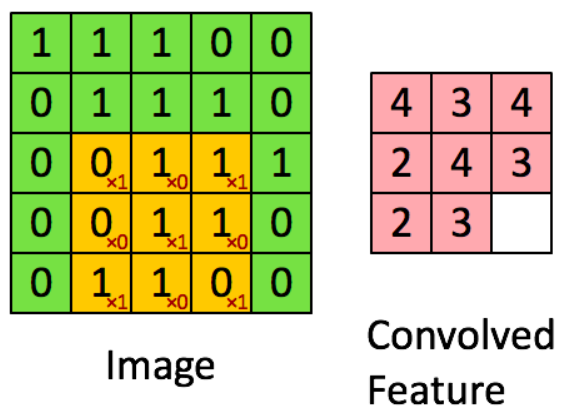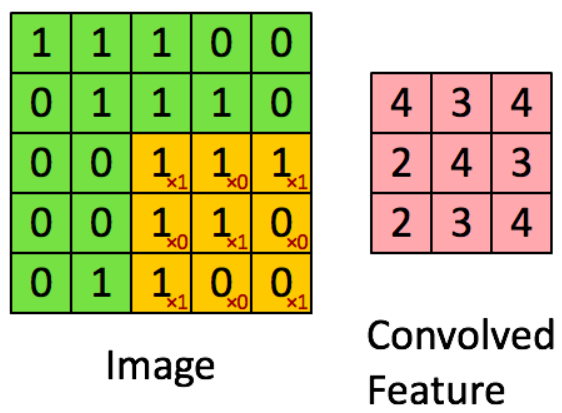

Bên trên là hình minh họa phép tích chập hai chiêù với mộ filter. Công thức của phép tích chập hai chiều:
$$
Y[i, j] = \sum_m \sum_n X[i + m, j + n] \cdot K[m, n]
$$


Trong đó: 
- X - Ma trận đầu vào biểu diễn hình ảnh
- K - Ma trận kernel `filter`
- Y[i, j] - Giá trị đầu ra tại vị trí (i, j) sau khi thực hiện phép tích chập

`2`. `Activation Layer`

Sau khi thực hiện phép tích chập thì dữ liệu sẽ đi qua lớp kích hoạt để thêm tính phi tuyến vào mô hình
- Hàm kích hoạt phổ biến nhất là `ReLU` (Rectified Linear Unit)
$$
\text{ReLU}(x) = \max(0, x)
$$
ReLU giúp loại bỏ các giá trị âm trong đầu ra của phép tích chập, giữ lại các giá trị dương và giúp tăng tốc quá trình huấn luyện

`3`. `Pooling Layer`

Lớp này có tác dụng `giảm size` của không gian `feature mapping`, giúp giảm số lượng tham số và tính toán trong network. 

Pooling layer còn làm cho mô hình bền vững hơn với các phép biến đổi như dịch chuyển/ xoay ảnh
- Điều này có nghĩa mô hình duy trì được hiệu suất (chính xác, khả năng nhận dạng, trích đặc trưng) khi ảnh đầu vào bị thay đổi nhẹ => `Tính bất biến với biến đổi nhỏ`
- Ví dụ: Khi ảnh đầu vào bị dịch chuyển, xéo góc hay mờ thì nó sẽ không làm hiệu suất của mô hình đã huấn luyện bị ảnh hưởng.

Lớp phổ biến nhất thường sử dụng là `Max Pooling`
$$
Y[i, j] = \max\left(X[i : i + f,\; j : j + f]\right)
$$
Trong đó f là `kích thước` của window


`4`. `Fully Connected Layer`

Sau khi đi qua nhiều lớp tích chập và gộp, các bản đồ đặc trưng `feature mapping` sẽ được làm phẳng thành một vector một chiều và đưa vào các lớp hoàn toàn kết nối.

Đối với các bài toán phân loại đa lớp thì lớp này thường sử dụng hàm kích hoạt softmax:
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$
Trong đó:
- $\text z_i: $Đầu ra của nơ-ron tại lớp fully connected

- $\text n: $ Số lớp phân loại đầu ra

`5`. `Backpropagation`

Quá trình huấn luyện CNN dùng lan truyền ngược để tối ưu hóa các tham số bằng cách giảm thiểu hàm loss. Hàm loss phổ biến cho bài toán phân loại là `cross-entropy`
$$
L = -\sum_i y_i \log(\hat{y}_i)
$$
Trong đó
- ${y_i}$: Giá trị thực tế `ground truth` cho lớp i
- $\hat{y}_i$: Xác suất dự đoán của mô hình cho lớp i

`6`. `Triển khai CNN trên Pytorch`

In [1]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Lớp tích chập đầu tiên: 1 kênh đầu vào, 32 kênh đầu ra, kernel size là 3x3
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # Lớp tích chập thứ hai: 32 kênh đầu vào, 64 kênh đầu ra, kernel size là 3x3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Lớp gộp: kernel size là 2x2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Lớp fully connected đầu tiên: từ 64 * 7 * 7 nút tới 128 nút
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Lớp fully connected thứ hai: từ 128 nút tới 10 nút (ứng với 10 lớp phân loại cho các chữ số 0-9)
        self.fc2 = nn.Linear(128, 10)
        # Hàm kích hoạt ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        # Tích chập với conv1, sau đó là ReLU và Max Pooling
        x = self.pool(self.relu(self.conv1(x)))
        # Tích chập với conv2, sau đó là ReLU và Max Pooling
        x = self.pool(self.relu(self.conv2(x)))
        # Làm phẳng từ tensor 4 chiều xuống 2 chiều để đưa vào fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # Lớp fully connected đầu tiên với ReLU
        x = self.relu(self.fc1(x))
        # Lớp fully connected cuối cùng, đầu ra là 10 lớp phân loại
        x = self.fc2(x)
        return x

`II`. `Khái niệm chính trong CNN`

`1`. `Stride`

Là bước nhảy của window tích chập khi nó di chuyển qua ảnh đầu vào. Giá trị stride quyết định tốc độ di chuyển của window.
- Ví dụ stride = 1, window sẽ bước qua một pixel
- stride = 2, window sẽ bước qua hai pixel

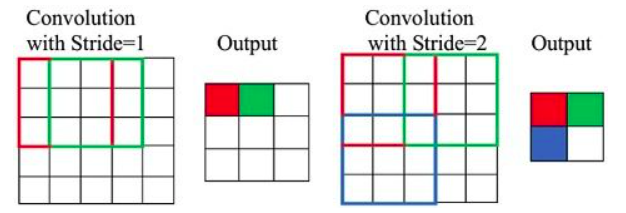

Giá trị stride càng lớn, kích thước của đầu ra sẽ nhỏ hơn vì cửa sổ tích chập sẽ bỏ qua nhiều pixel hơn => Giảm độ phân giải của đầu ra, nhưng đồng thời giảm thiểu khối lượng tính toán.

`2`. `Padding`

Là kỹ thuật `thêm` các pixel giả (thường là giá trị 0, gọi là zero padding) xung quanh biên của ảnh đầu vào => Giúp duy trì kích thước đầu ra sau khi tích chập. 

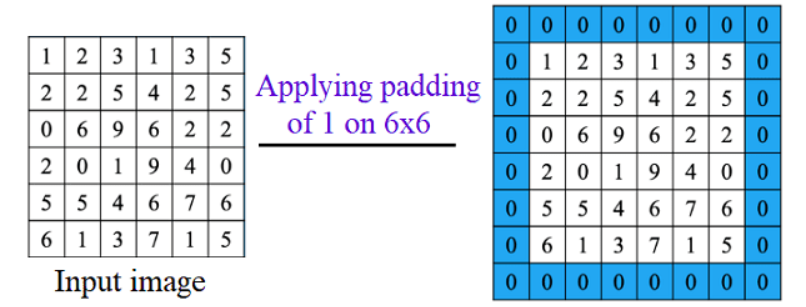

Trong nhiều trường hợp, người ta thêm padding để kích thước đầu ra của lớp tích chập không bị giảm.
- Ví dụ: Không có padding thì phần biên của ảnh bị “bỏ qua” trong tích chập, vì kernel không thể quét ra ngoài ảnh. 
- Sau mỗi lớp conv/pooling làm nhỏ ảnh lại thì có thể rất nhanh sau vài lớp ảnh sẽ qúa nhỏ/mất hết toàn bộ thông tin => padding giúp duy trì kích thước để ta có thể xây dựng mạng nó sâu hơn mà vẫn còn thông tin để đọc

Padding không làm mất đặc trưng mà thậm chí còn tăng khả năng bắt đặc trưng ở biên

=> Mục tiêu là lấy đặc trưng, nhưng padding giúp giữ thông tin biên, duy trì kích thước, và hỗ trợ thiết kế mạng sâu, phức tạp hơn.

`3`. `Filters` (Kernels)

Filters hay còn gọi là kernels là các `ma trận nhỏ` được áp dụng lên ảnh đầu vào trong quá trình tích chập. Các bộ lọc này thực hiện việc `quét` qua toàn bộ ảnh đầu vào, `tính toán` các giá trị mới dựa trên phép nhân tích chập giữa bộ lọc và các phần tương ứng của ảnh.

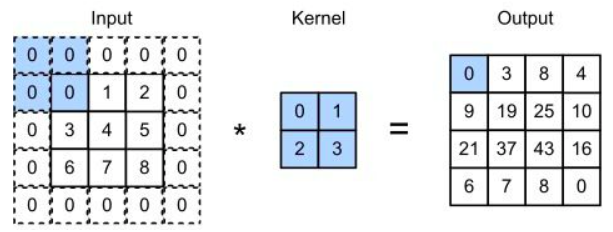

Mỗi bộ lọc sẽ phát hiện các đặc trưng cụ thể, chẳng hạn như cạnh, đường nét, hoặc chi tiết phức tạp hơn ở các lớp sâu. 
- Mỗi lớp tích chập trong mạng CNN có thể sử dụng nhiều bộ lọc để phát hiện nhiều đặc trưng khác nhau.

`4`. `Feature Maps`

Là `kết quả đầu ra` của một lớp `tích chập` sau khi áp dụng các `bộ lọc` lên ảnh đầu vào. Đây là nơi `lưu trữ các đặc trưng` đã được phát hiện bởi các bộ lọc trong quá trình tích chập.
- Feature maps thể hiện sự hiện diện của các đặc trưng (như cạnh, góc) trong một bức ảnh tại các vị trí không gian khác nhau.
- Các feature maps càng sâu (tầng về sau) trong mạng CNN thì chứa các đặc trưng `càng phức tạp`, `trừu tượng hơn`

`III`. `Quy trình huấn luyện trong CNN`

Khi nói đến huấn luyện mạng (train a network) thì mục tiêu cốt lõi là `Cập nhật các parameters trong mạng để mô hình có thể dự đoán đầu ra gần đúng nhất với thực tế (ground truth)`

Thì khi huấn luyện CNN cũng có mục đích như thế. Các bước chính trong quá trình huấn luyện CNN

`1`. `Chuẩn bị dữ liệu`

`Tiền xử lý dữ liệu`

Các hình ảnh đầu vào thường cần được điều chỉnh kích thước, `chuẩn hóa giá trị pixel` về một khoảng giá trị nhất định (ví dụ: từ 0 đến 1), và `đôi khi được áp dụng các kỹ thuật tăng cường dữ liệu` (data augmentation) như xoay, lật ảnh để tăng tính đa dạng của dữ liệu.

In [ ]:
# # 1. Định nghĩa các phép biến đổi (transform) cho dữ liệu
# transform = transforms.Compose([
#     transforms.Resize((28, 28)),          # Thay đổi kích thước ảnh về 28x28
#     transforms.ToTensor(),                # Chuyển đổi ảnh thành tensor
#     transforms.Normalize((0.1307,), (0.3081,))  # Chuẩn hóa dữ liệu với giá trị trung bình và độ lệch chuẩn
# ])

`Phân chia dữ liệu`

Thường được chia làm 3 phần:
- `Training set` - dùng để huấn luyện mô hình
- `Validation set` - dùng để đánh giá mô hình trong quá trình huấn luyện nhằm ngắn chặn overfitting
- `Test set` - dùng để đánh giá mô hình sau khi hoàn thành huấn luyện

`2`. `Truyền dữ liệu qua mạng`

Quá trình huấn luyện bắt đầu bằng cách cho dữ liệu đi qua mạng.

`Forward`

Dữ liệu đầu vào đi qua các lớp của mạng CNN, bắt đầu từ lớp tích chập, lớp kích hoạt (ReLU), lớp pooling (giảm kích thước), và cuối cùng là lớp fully connected (kết nối đầy đủ)
- Các lớp tích chập (convolutional layers) thực hiện tích chập với các bộ lọc (filters) để phát hiện các đặc trưng của ảnh.
- Các lớp pooling giảm kích thước của bản đồ đặc trưng (feature maps), giúp giảm khối lượng tính toán và trích xuất các đặc trưng chính.
- Cuối cùng, lớp fully connected tạo ra dự đoán (output) về lớp của ảnh.

`3`. `Loss function`

Sau khi nhận được đầu ra từ mạng, một hàm mất mát (loss function) được sử dụng để `đo lường sự khác biệt` giữa dự đoán của mạng và giá trị nhãn thực tế của dữ liệu

Hàm loss phổ biến: Cross-Entropy loss - giúp tính toán mức độ sai lệch giữa xác suất dự đoán của mạng và nhãn thực tế.

In [ ]:
# model = SimpleCNN()
# criterion = nn.CrossEntropyLoss()  # Hàm mất mát Cross-Entropy
# ...
# ...
# outputs = model(inputs)  # Forward pass
# loss = criterion(outputs, labels)  # Tính toán hàm mất mát

`4`. `Backward`

Sau khi tính toán hàm mất mát, quá trình lan truyền ngược (backpropagation) bắt đầu để cập nhật các tham số (weights) của mạng:
- `Tính gradient`: Quá trình này sử dụng đạo hàm của hàm mất mát với từng trọng số (weight) của các lớp thông qua quy tắc chuỗi (chain rule). Điều này cho phép tính toán được gradient, cho biết trọng số nào cần điều chỉnh và điều chỉnh bao nhiêu.
- `Cập nhật weights`: Các tham số weights của mạng được cập nhật bằng cách sử dụng thuật toán tối ưu hóa, phổ biến nhất là stochastic gradient descent (SGD) hoặc các biến thể của nó như Adam. Các tham số này được điều chỉnh để làm giảm hàm mất mát trong các lần lặp tiếp theo.

Quá trình trên (forward pass, tính hàm mất mát, backpropagation) diễn ra trong nhiều lần lặp gọi là `epoch`
- Trong mỗi epoch, mạng sẽ trải qua toàn bộ dữ liệu huấn luyện.
- Sau đó, mạng tiếp tục được đánh giá trên bộ dữ liệu kiểm định (validation set) để theo dõi độ chính xác và kiểm tra tình trạng `overfitting`.

`Early stopping` 

Trong quá trình huấn luyện, nếu độ chính xác trên tập kiểm định bắt đầu giảm mặc dù độ chính xác trên tập huấn luyện tăng, quá trình huấn luyện có thể được dừng sớm (early stopping) để tránh hiện tượng `overfitting`.